In [49]:
#B1: đọc dữ liệu từ bridge_game.txt
import numpy as np
with open('input_txt/bridge_game2.txt', 'r') as f:
    data = f.read()
    data = data.split('\n')
    data = np.array(data)
    print(data.shape)
    print(data)

(20,)
['4.3..4.6.2..3..2.4....2.' '.4..2...1.2...2.1.......'
 '3..2.3......3...........' '..4....7.1.....3.7....3.'
 '........2.6.5.2...1..2..' '..4..2.....2.4.3........'
 '.5.....6..6......6...5..' '...........1.1..........'
 '1.............1.3.2..4..' '.2......2.5......3.2....'
 '3..1.......3.4..7.....4.' '.1.....5.1.......3...2..'
 '3...........2.3...2...5.' '.1.....2...1.....4..2...'
 '3..1.5....6...5.........' '................3.2.3.5.'
 '.2..2................1..' '..2.........2...2.1.1.2.'
 '.1...3..1...............' '3.4.3.....4.4.4..4...3.1']


In [50]:
type(data.shape)

tuple

In [51]:
for i in range(len(data)):
    print(data[i])

4.3..4.6.2..3..2.4....2.
.4..2...1.2...2.1.......
3..2.3......3...........
..4....7.1.....3.7....3.
........2.6.5.2...1..2..
..4..2.....2.4.3........
.5.....6..6......6...5..
...........1.1..........
1.............1.3.2..4..
.2......2.5......3.2....
3..1.......3.4..7.....4.
.1.....5.1.......3...2..
3...........2.3...2...5.
.1.....2...1.....4..2...
3..1.5....6...5.........
................3.2.3.5.
.2..2................1..
..2.........2...2.1.1.2.
.1...3..1...............
3.4.3.....4.4.4..4...3.1


In [52]:
sizeX = data.shape[0]
sizeY = len(data[0])
print(sizeX, sizeY)

20 24


In [53]:
#B2: tạo dictionary nodes
counter = 0
from model.node import Node
nodes = {}
#get id from position
position = {}
for i in range(sizeX):
    for j in range(sizeY):
        if data[i][j] != '.':
            nodes[counter] = Node(
                id = counter,
                goal_order= int(data[i][j]),
                x = i,
                y = j,
                potenial_neighbor_ids = [])
            position[(i,j)] = counter
            counter += 1
for key, value in nodes.items():
    print(value)

Node(id: 0, goal_order: 4, [],x= 0,y= 0)
Node(id: 1, goal_order: 3, [],x= 0,y= 2)
Node(id: 2, goal_order: 4, [],x= 0,y= 5)
Node(id: 3, goal_order: 6, [],x= 0,y= 7)
Node(id: 4, goal_order: 2, [],x= 0,y= 9)
Node(id: 5, goal_order: 3, [],x= 0,y= 12)
Node(id: 6, goal_order: 2, [],x= 0,y= 15)
Node(id: 7, goal_order: 4, [],x= 0,y= 17)
Node(id: 8, goal_order: 2, [],x= 0,y= 22)
Node(id: 9, goal_order: 4, [],x= 1,y= 1)
Node(id: 10, goal_order: 2, [],x= 1,y= 4)
Node(id: 11, goal_order: 1, [],x= 1,y= 8)
Node(id: 12, goal_order: 2, [],x= 1,y= 10)
Node(id: 13, goal_order: 2, [],x= 1,y= 14)
Node(id: 14, goal_order: 1, [],x= 1,y= 16)
Node(id: 15, goal_order: 3, [],x= 2,y= 0)
Node(id: 16, goal_order: 2, [],x= 2,y= 3)
Node(id: 17, goal_order: 3, [],x= 2,y= 5)
Node(id: 18, goal_order: 3, [],x= 2,y= 12)
Node(id: 19, goal_order: 4, [],x= 3,y= 2)
Node(id: 20, goal_order: 7, [],x= 3,y= 7)
Node(id: 21, goal_order: 1, [],x= 3,y= 9)
Node(id: 22, goal_order: 3, [],x= 3,y= 15)
Node(id: 23, goal_order: 7, [],x= 3

In [54]:
position

{(0, 0): 0,
 (0, 2): 1,
 (0, 5): 2,
 (0, 7): 3,
 (0, 9): 4,
 (0, 12): 5,
 (0, 15): 6,
 (0, 17): 7,
 (0, 22): 8,
 (1, 1): 9,
 (1, 4): 10,
 (1, 8): 11,
 (1, 10): 12,
 (1, 14): 13,
 (1, 16): 14,
 (2, 0): 15,
 (2, 3): 16,
 (2, 5): 17,
 (2, 12): 18,
 (3, 2): 19,
 (3, 7): 20,
 (3, 9): 21,
 (3, 15): 22,
 (3, 17): 23,
 (3, 22): 24,
 (4, 8): 25,
 (4, 10): 26,
 (4, 12): 27,
 (4, 14): 28,
 (4, 18): 29,
 (4, 21): 30,
 (5, 2): 31,
 (5, 5): 32,
 (5, 11): 33,
 (5, 13): 34,
 (5, 15): 35,
 (6, 1): 36,
 (6, 7): 37,
 (6, 10): 38,
 (6, 17): 39,
 (6, 21): 40,
 (7, 11): 41,
 (7, 13): 42,
 (8, 0): 43,
 (8, 14): 44,
 (8, 16): 45,
 (8, 18): 46,
 (8, 21): 47,
 (9, 1): 48,
 (9, 8): 49,
 (9, 10): 50,
 (9, 17): 51,
 (9, 19): 52,
 (10, 0): 53,
 (10, 3): 54,
 (10, 11): 55,
 (10, 13): 56,
 (10, 16): 57,
 (10, 22): 58,
 (11, 1): 59,
 (11, 7): 60,
 (11, 9): 61,
 (11, 17): 62,
 (11, 21): 63,
 (12, 0): 64,
 (12, 12): 65,
 (12, 14): 66,
 (12, 18): 67,
 (12, 22): 68,
 (13, 1): 69,
 (13, 7): 70,
 (13, 11): 71,
 (13, 17): 72

In [55]:
def order_pair(a,b):
    if a < b:
        return (a,b)
    else:
        return (b,a)

In [56]:
#B3: tạo các neighbor cho các node
edges = set()
for node_i in nodes.keys():
    x = nodes[node_i].x
    y = nodes[node_i].y
    leftx = x - 1
    while(leftx >= 0):
        if (leftx, y) in position.keys():
            nodes[node_i].potenial_neighbor_ids.append(position[(leftx, y)])
            edges.add(order_pair(node_i, position[(leftx, y)]))
            break
        leftx -= 1
    rightx = x + 1
    while(rightx < sizeX):
        if (rightx, y) in position.keys():
            nodes[node_i].potenial_neighbor_ids.append(position[(rightx, y)])
            edges.add(order_pair(node_i, position[(rightx, y)]))
            break
        rightx += 1
    upy = y - 1
    while(upy >= 0):
        if (x, upy) in position.keys():
            nodes[node_i].potenial_neighbor_ids.append(position[(x, upy)])
            edges.add(order_pair(node_i, position[(x, upy)]))
            break
        upy -= 1
    downy = y + 1
    while (downy < sizeY):
        if (x, downy) in position.keys():
            nodes[node_i].potenial_neighbor_ids.append(position[(x, downy)])
            edges.add(order_pair(node_i, position[(x, downy)]))
            break
        downy += 1
    

In [57]:
edges
#len(edges)

{(0, 1),
 (0, 15),
 (1, 2),
 (1, 19),
 (2, 3),
 (2, 17),
 (3, 4),
 (3, 20),
 (4, 5),
 (4, 21),
 (5, 6),
 (5, 18),
 (6, 7),
 (6, 22),
 (7, 8),
 (7, 23),
 (8, 24),
 (9, 10),
 (9, 36),
 (10, 11),
 (10, 84),
 (11, 12),
 (11, 25),
 (12, 13),
 (12, 26),
 (13, 14),
 (13, 28),
 (14, 45),
 (15, 16),
 (15, 43),
 (16, 17),
 (16, 54),
 (17, 18),
 (17, 32),
 (18, 27),
 (19, 20),
 (19, 31),
 (20, 21),
 (20, 37),
 (21, 22),
 (21, 61),
 (22, 23),
 (22, 35),
 (23, 24),
 (23, 39),
 (24, 58),
 (25, 26),
 (25, 49),
 (26, 27),
 (26, 38),
 (27, 28),
 (27, 65),
 (28, 29),
 (28, 44),
 (29, 30),
 (29, 46),
 (30, 40),
 (31, 32),
 (31, 86),
 (32, 33),
 (32, 76),
 (33, 34),
 (33, 41),
 (34, 35),
 (34, 42),
 (36, 37),
 (36, 48),
 (37, 38),
 (37, 60),
 (38, 39),
 (38, 50),
 (39, 40),
 (39, 51),
 (40, 47),
 (41, 42),
 (41, 55),
 (42, 56),
 (43, 44),
 (43, 53),
 (44, 45),
 (44, 66),
 (45, 46),
 (45, 57),
 (46, 47),
 (46, 67),
 (47, 63),
 (48, 49),
 (48, 59),
 (49, 50),
 (49, 94),
 (50, 51),
 (50, 77),
 (51, 52),
 (51

In [58]:
#B4: tìm các cặp cạnh cắt nhau
cut_edges = set()
for edge_i in edges:
    #cạnh i là cạnh dọc thì bỏ qua
    if nodes[edge_i[0]].y == nodes[edge_i[1]].y:
        continue
    #nên canh i là cạnh ngang
    for edge_j in edges:
        #cạnh j là cạnh ngang thì bỏ qua
        if nodes[edge_j[0]].x == nodes[edge_j[1]].x:
            continue
        #nên canh j là cạnh dọc
        if edge_i != edge_j:
            #2 cạnh ko chung đỉnh
            if edge_i[0] != edge_j[0] and edge_i[0] != edge_j[1] and edge_i[1] != edge_j[0] and edge_i[1] != edge_j[1]:
                x_i = nodes[edge_i[0]].x
                y_j = nodes[edge_j[0]].y
                x_1 = nodes[edge_j[0]].x
                x_2 = nodes[edge_j[1]].x
                y_1 = nodes[edge_i[0]].y
                y_2 = nodes[edge_i[1]].y
                if(x_1<x_i and x_i<x_2 and y_1<y_j and y_j<y_2):
                    cut_edges.add((edge_i, edge_j))

In [59]:
cut_edges

{((9, 10), (1, 19)),
 ((10, 11), (2, 17)),
 ((10, 11), (3, 20)),
 ((11, 12), (4, 21)),
 ((12, 13), (5, 18)),
 ((13, 14), (6, 22)),
 ((15, 16), (1, 19)),
 ((15, 16), (9, 36)),
 ((16, 17), (10, 84)),
 ((17, 18), (3, 20)),
 ((17, 18), (4, 21)),
 ((17, 18), (11, 25)),
 ((17, 18), (12, 26)),
 ((19, 20), (10, 84)),
 ((19, 20), (16, 54)),
 ((19, 20), (17, 32)),
 ((20, 21), (11, 25)),
 ((21, 22), (12, 26)),
 ((21, 22), (13, 28)),
 ((21, 22), (18, 27)),
 ((22, 23), (14, 45)),
 ((25, 26), (21, 61)),
 ((28, 29), (14, 45)),
 ((28, 29), (22, 35)),
 ((28, 29), (23, 39)),
 ((31, 32), (10, 84)),
 ((31, 32), (16, 54)),
 ((32, 33), (20, 37)),
 ((32, 33), (21, 61)),
 ((32, 33), (25, 49)),
 ((32, 33), (26, 38)),
 ((33, 34), (27, 65)),
 ((34, 35), (28, 44)),
 ((36, 37), (10, 84)),
 ((36, 37), (16, 54)),
 ((36, 37), (31, 86)),
 ((36, 37), (32, 76)),
 ((37, 38), (21, 61)),
 ((37, 38), (25, 49)),
 ((38, 39), (14, 45)),
 ((38, 39), (27, 65)),
 ((38, 39), (28, 44)),
 ((38, 39), (33, 41)),
 ((38, 39), (34, 42)),

In [60]:
nodes[22].x,nodes[22].y

(3, 15)

In [61]:
#Phần 2: tạo model 
import gurobipy as gp
from gurobipy import GRB
model = gp.Model('bridge_game')

In [62]:
x = {}
for edge_key in edges:
    x[edge_key] = model.addVar(vtype=GRB.BINARY, name=f'x_{edge_key}')
    x[edge_key,2] = model.addVar(vtype=GRB.BINARY, name=f'x_{edge_key}_2') #cái cạnh thứ 2 copy 

In [63]:

for node_id in nodes.keys():
    #lấy ra các cạnh có chứa node_id
    edges_contain_node_id = []
    for neighbor_id in nodes[node_id].potenial_neighbor_ids:
        edge_key = order_pair(node_id, neighbor_id)
        edges_contain_node_id.append (x[edge_key])
        edges_contain_node_id.append(x[edge_key,2])
    model.addConstr(sum(edges_contain_node_id) == nodes[node_id].goal_order, name=f'node_{node_id}')
        
    

In [64]:
model.optimize()
#print value
for v in model.getVars():
    if v.x > 0:
        print(v.varName, v.x)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-2500 CPU @ 3.30GHz, instruction set [SSE2|AVX]
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 104 rows, 330 columns and 660 nonzeros
Model fingerprint: 0x4fe6617b
Variable types: 0 continuous, 330 integer (330 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+00]
Presolve removed 57 rows and 237 columns
Presolve time: 0.00s
Presolved: 47 rows, 93 columns, 186 nonzeros
Variable types: 0 continuous, 93 integer (60 binary)
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
x_(72, 

In [65]:
#B6: check các cạnh cắt nhau
for cut_edge in cut_edges:
    edge1 = cut_edge[0]
    edge2 = cut_edge[1]
    model.addConstr(x[edge1] + x[edge2] <= 1, name=f'cut_{edge1}_{edge2}')
    model.addConstr(x[edge1, 2] + x[edge2] <= 1, name=f'cut_{edge1,2}_{edge2}')
    model.addConstr(x[edge1] + x[edge2, 2] <= 1, name=f'cut_{edge1}_{edge2,2}')
    model.addConstr(x[edge1, 2] + x[edge2, 2] <= 1, name=f'cut_{edge1,2}_{edge2,2}')
    
model.optimize()
for v in model.getVars():
    if v.x > 0:
        print(v.varName, v.x)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-2500 CPU @ 3.30GHz, instruction set [SSE2|AVX]
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 676 rows, 330 columns and 1804 nonzeros
Model fingerprint: 0x08e62a99
Variable types: 0 continuous, 330 integer (330 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+00]

MIP start from previous solve did not produce a new incumbent solution
MIP start from previous solve violates constraint cut_(84,_85)_(76,_93) by 1.000000000

Presolve removed 676 rows and 330 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.00000000000

In [66]:
#B7: check đồ thị liên thông

    

In [67]:
#B7: tiếp : check value in model
from check_connected_graph import CheckConnectedGraph


edges_set = set()
for edge in edges:
    if x[edge].x > 0.5 or x[edge,2].x > 0.5:
        edges_set.add(edge)
check_connected_graph = CheckConnectedGraph(edges_set=edges_set, nvertex=len(nodes))
a = check_connected_graph.check_connected_graph()
a

True

In [68]:
max_iteration = 100
for i in range(max_iteration):
    #nếu bị infeasible thì dừng
    if model.status == GRB.INFEASIBLE:
        print('INFEASIBLE')
        break
    print('Lâp lần thứ ', i)
    edges_set = set()
    old_key = []
    for edge in edges:
        #print('edge', edge)
        #print('x[edge].x', x[edge].x)
        if x[edge].x > 0.5 or x[(edge,2)].x > 0.5:
            edges_set.add(edge)
        if(x[edge].x > 0.5):
            old_key.append(edge)
        if(x[(edge,2)].x > 0.5):
            old_key.append((edge,2))
    check_connected_graph = CheckConnectedGraph(edges_set=edges_set, nvertex=len(nodes))
    a = check_connected_graph.check_connected_graph()
    if(a == True):
        print('connected')
        break
    #cắt nghiệm cũ đi 
    #lấy tất cả những biến có giá trị > 0.5
    #tạo ra 1 ràng buộc mới
    model.addConstr(sum(x[old_key[j]] for j in range(len(old_key))  ) <= len(old_key) - 1, name=f'cut_old{i}')
    model.optimize()
#print value
for v in model.getVars():
    if v.x > 0:
        print(v.varName, v.x)

Lâp lần thứ  0
connected
x_(72, 73) 1.0
x_(72, 73)_2 1.0
x_(62, 72)_2 1.0
x_(79, 88) 1.0
x_(79, 88)_2 1.0
x_(67, 68) 1.0
x_(67, 68)_2 1.0
x_(44, 45) 1.0
x_(22, 35)_2 1.0
x_(39, 51)_2 1.0
x_(100, 101) 1.0
x_(100, 101)_2 1.0
x_(66, 78) 1.0
x_(96, 97)_2 1.0
x_(9, 10) 1.0
x_(9, 10)_2 1.0
x_(78, 100) 1.0
x_(78, 100)_2 1.0
x_(36, 48) 1.0
x_(36, 48)_2 1.0
x_(13, 28) 1.0
x_(53, 64) 1.0
x_(53, 64)_2 1.0
x_(38, 39) 1.0
x_(38, 39)_2 1.0
x_(80, 81)_2 1.0
x_(24, 58)_2 1.0
x_(75, 76)_2 1.0
x_(16, 17) 1.0
x_(16, 17)_2 1.0
x_(81, 82)_2 1.0
x_(7, 23) 1.0
x_(7, 23)_2 1.0
x_(22, 23) 1.0
x_(22, 23)_2 1.0
x_(77, 78) 1.0
x_(77, 78)_2 1.0
x_(38, 50) 1.0
x_(38, 50)_2 1.0
x_(40, 47) 1.0
x_(40, 47)_2 1.0
x_(49, 50) 1.0
x_(49, 50)_2 1.0
x_(13, 14)_2 1.0
x_(55, 56) 1.0
x_(37, 60) 1.0
x_(37, 60)_2 1.0
x_(42, 56) 1.0
x_(51, 52) 1.0
x_(51, 52)_2 1.0
x_(46, 47) 1.0
x_(46, 47)_2 1.0
x_(23, 24) 1.0
x_(23, 24)_2 1.0
x_(5, 18)_2 1.0
x_(20, 37) 1.0
x_(20, 37)_2 1.0
x_(83, 84)_2 1.0
x_(77, 98)_2 1.0
x_(19, 20) 1.0
x_(19, 2

In [69]:
#kiểm tra tình trạng model có optimal hay ko
if model.status == GRB.OPTIMAL:
    print('optimal')
    #in số ràng buộc
    print('number of constrains', model.NumConstrs)

optimal
number of constrains 676


In [70]:
#kiểm tra tính liên thông
edges_set = set()
for edge in edges:
    if x[edge].x > 0.5 or x[(edge,2)].x > 0.5:
        edges_set.add(edge)
check_connected_graph = CheckConnectedGraph(edges_set=edges_set, nvertex=len(nodes))
a = check_connected_graph.check_connected_graph()
a

True

In [71]:
#in ra đồ thị
edge_dict = {}
for edge in edges:
    edge_dict[edge] = 0
    if x[edge].x > 0.5:
        edge_dict[edge] += 1
    if x[(edge,2)].x > 0.5:
        edge_dict[edge] += 1
edge_dict


{(72, 73): 2,
 (62, 72): 1,
 (79, 88): 2,
 (67, 68): 2,
 (44, 45): 1,
 (73, 81): 0,
 (99, 100): 0,
 (51, 62): 0,
 (22, 35): 1,
 (39, 51): 1,
 (100, 101): 2,
 (32, 76): 0,
 (66, 78): 1,
 (41, 42): 0,
 (96, 97): 1,
 (31, 86): 0,
 (9, 10): 2,
 (74, 75): 0,
 (78, 100): 2,
 (15, 16): 0,
 (36, 48): 2,
 (13, 28): 1,
 (53, 64): 2,
 (38, 39): 2,
 (48, 49): 0,
 (80, 81): 1,
 (24, 58): 1,
 (75, 76): 1,
 (1, 19): 0,
 (16, 17): 2,
 (71, 72): 0,
 (81, 82): 1,
 (7, 23): 2,
 (27, 65): 0,
 (12, 13): 0,
 (22, 23): 2,
 (77, 78): 2,
 (38, 50): 2,
 (40, 47): 2,
 (49, 50): 2,
 (69, 83): 0,
 (13, 14): 1,
 (21, 61): 0,
 (45, 46): 0,
 (55, 56): 1,
 (50, 51): 0,
 (37, 60): 2,
 (42, 56): 1,
 (51, 52): 2,
 (46, 47): 2,
 (23, 24): 2,
 (5, 18): 1,
 (20, 37): 2,
 (83, 84): 1,
 (77, 98): 1,
 (19, 20): 2,
 (17, 32): 0,
 (79, 80): 0,
 (11, 25): 0,
 (45, 57): 2,
 (56, 57): 2,
 (85, 102): 1,
 (47, 63): 0,
 (6, 22): 0,
 (20, 21): 1,
 (12, 26): 1,
 (15, 43): 1,
 (57, 58): 2,
 (84, 97): 1,
 (89, 90): 0,
 (53, 54): 1,
 (19, 

In [81]:
from matplotlib import pyplot as plt
import networkx as nx
n = len(nodes)
#G là multigraph
G = nx.DiGraph()
G.add_nodes_from(range(n))

for edge in edges:
    if edge_dict[edge] >= 1:
        G.add_edge(edge[0], edge[1], )
    if edge_dict[edge] == 2:
        G.add_edge(edge[1], edge[0],)

fig, ax = plt.subplots(figsize=(100,100))

nx.draw(G,
       pos ={i:(nodes[i].x, nodes[i].y) for i in range(n)} ,
       
       node_size=10000, node_color='green', font_size=100, font_color='white',
       labels={i: nodes[i].goal_order for i in range(n)},
       edge_color='black', width=3, style='solid',
       connectionstyle='arc3, rad = 0.1',
       arrowsize=50,
       arrowstyle='-',
        arrows=True,
       )


#dat size do thi la 30 x 30

plt.show()

d:\app\Cacao\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:304: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


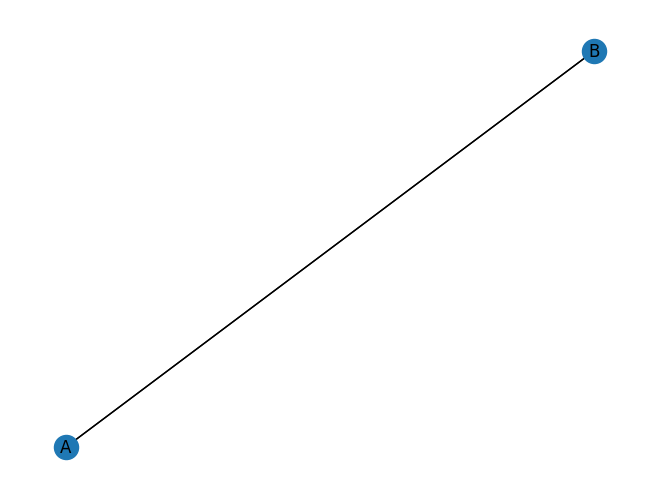

In [74]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph() #or G = nx.MultiDiGraph()
G.add_node('A')
G.add_node('B')
G.add_edge('A', 'B', length = 2)
G.add_edge('B', 'A', length = 3)

pos = {'A': (0, 0), 'B': (1, 1)}
nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.1',
        arrowstyle='-|>', arrowsize=20, arrows=False)
edge_labels=dict([((u,v,),d['length'])
             for u,v,d in G.edges(data=True)])

plt.show()